### Задание 1

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов (решение на бумажке и на python).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import binom
import statistics

from numpy.random import choice
from scipy.stats import *

%matplotlib inline

In [3]:
def iprimes_upto(limit):
    is_prime = [False] * 2 + [True] * (limit - 1)
    for n in range(int(limit**0.5 + 1.5)): # stop at ``sqrt(limit)``
        if is_prime[n]:
            for i in range(n * n, limit + 1, n): # start at ``n`` squared
                is_prime[i] = False
    for i in range(limit + 1):
        if is_prime[i]: yield i

In [4]:
x = list(iprimes_upto(15))
n, p = 15, 0.5
prb = 0
for xx in x:
    prb += binom.pmf(xx, n, p)
prb

0.3499755859375009

In [5]:
x

[2, 3, 5, 7, 11, 13]

Простые числа в интервале от 1 до 15 будут: 2, 3, 5, 7, 11, 13. Всего простых чисел 6. Всего чисел в нашем множестве 15. Вероятность выпадения любого числа в нашем случае имеет биноминальное распределение. Нас интересует сумма шести слагаемых, отвечающих за выпадение простых чисел. 

In [6]:
p = 0.5
n = 15

In [7]:
b2 = binom.pmf (2, n, p)
b3 = binom.pmf (3, n, p)
b5 = binom.pmf (5, n, p)
b7 = binom.pmf (7, n, p)
b11 = binom.pmf (11, n, p)
b13 = binom.pmf (13, n, p)

In [8]:
b2 + b3 + b5 + b7 + b11 + b13

0.3499755859375009

### Решение на бумажке:
Количество экспериментов (n) - 15. Количество простых чисел от 1 до 15 - 6 (2,3,5,7,11,13)

Так как результат броска одной монеты не влияет на последующие броски, вероятность выпадения орла в каждом броске одинакова (и равна p=1/2=0.5), то можно для вычисления вероятности применить формулу Бернулли:

p(k) = c*((1/2)**n) = (в нашем случае) с/32768

где c = n!/(k!*(1-k)!)

После чего сложим вероятности всех событий:

p = (p(2)+p(3)+p(5)+p(7)+p(11)+p(13))/32768 = 105+455+3003+6435+1365+105 = 11468/32768 = 0,35

### Задание 2

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [9]:
from random import randint

i = 0
res = []
while i < 1000:
    res.append(randint(1,10))
    i += 1

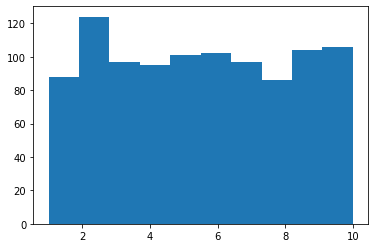

In [10]:
plt.hist(res)
plt.show()

In [13]:
print(f'Среднее: {np.mean(res)}, Медиана: {np.median(res)}, Дисперсия: {np.var(res)}')

Среднее: 5.487, Медиана: 5.0, Дисперсия: 8.347831


### Задание 3

Пусть брошены 3 уравновешенные монеты. Рассмотрим 3 события:

$A_1$ - монеты 1 и 2 упали одной и той же стороной,

$A_2$ - монеты 2 и 3 упали одной и той же стороной,

$A_3$ - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события являются попарно независимыми, но <b>не</b> являются независимыми в совокупности.

Попарно события независимы. Рассмотрим произвольную пару событий (любую). Аналогично для других пар. Возьмём пару событий $A_1$ и $A_3$. Пусть выполнено одно из них, например $A_3$. Это означает, что монеты 1 и 3 упали одной и той же стороной. Данная информация нам не даёт информации о состоянии монеты 2. Следовательно мы не знаем произошло или нет событие $A_1$. Как результат наступления события $A_3$ не изменяет вероятность наступления события $A_1$. События $A_1$ и $A_3$ попарно независимы, как и любая другая пара событий из этой тройки событий.

Все три события в совокупности зависимы. Пусть события $A_1$ и $A_2$ произошли. Согласно событиям $A_1$ и $A_2$ монеты 1, 2, 3 упали одной и той же стороной, то есть и событие $A_3$ выполнено. Также можно рассуждать, взяв за основу то, что события $A_1$ и $A_3$ выполнены, тогда как следствие событие $A_2$ выполнено. Если события $A_2$ и $A_3$ произошли, то и монеты 1 и 2 упали одной стороной (событие $A_1$).

### Задание 4 (формула полной вероятности)

В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

Обозначим через $A$ событие, заключающееся в том, что будет куплена продукция высшего сорта, через $B_1$, $B_2$, $B_3$ обозначним события, заключающиеся в покупке продукции, принадлежащей соответственно первому, второму и третьему предприятиям.

Можно применить формулу полной вероятности, причём в наших обозначениях:
1. $P(B_1)$ = 0,2 $P(A|B_1)$ = 0,1
2. $P(B_2)$ = 0,3 $P(A|B_2)$ = 0,05
3. $P(B_3)$ = 0,5 $P(A|B_3)$ = 0,2

Подставляя эти значения в формулу полной вероятности, получим искомую вероятность:
$P(A) = P(A|B_1) * P(B_1) + P(A|B_2) * P(B_2) + P(A|B_3) P(B_3)$

$P(A) = 0,2 * 0,1 + 0,3 * 0,05 + 0,5 * 0,2$

$P(A) = 0,135$